# Las Vegas Trip Advisor Dataset Analysis
The goal of this project is to perform comprehensive regression analysis on the Las Vegas Trip Advisor dataset. This includes exploratory data analysis, multiple regression models, and model evaluations to gain insights and make predictions on tourism trends in Las Vegas.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

---

# Step 2: Loading the Las Vegas Trip Advisor Dataset
The Las Vegas Trip Advisor dataset is available on Kaggle. After downloading, load the dataset into a Pandas DataFrame.


In [6]:
df = pd.read_csv('LasVegas_Trip_Advisor_Reviews.csv', delimiter=';')

df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,"Review weekday,"
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,"Thursday,"
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,"Friday,"
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,"Saturday,"
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,"Friday,"
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,"Tuesday,"


---

# Step 3: Understanding the Dataset
In this step, we will explore the basic structure of the dataset, including the number of rows, columns, and data types of each column.


In [8]:
df.info()

df.isnull().sum()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


### Step 3: Check for Missing Values

Next, we’ll check for missing values in each column. If missing values are present, we’ll handle them by either dropping or imputing them.


In [10]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 User country         0
Nr. reviews          0
Nr. hotel reviews    0
Helpful votes        0
Score                0
Period of stay       0
Traveler type        0
Pool                 0
Gym                  0
Tennis court         0
Spa                  0
Casino               0
Free internet        0
Hotel name           0
Hotel stars          0
Nr. rooms            0
User continent       0
Member years         0
Review month         0
Review weekday,      0
dtype: int64


### Step 4: Remove Duplicates

We’ll check for duplicate rows and remove them if any are found.


In [12]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify removal
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


### Step 5: Correct Inconsistencies in Categorical Data

Standardize text values in categorical columns to ensure consistency. For example, we can convert text to lowercase and handle common variations.


In [14]:
# Convert categorical columns to lowercase
df['User country'] = df['User country'].str.lower()
df['Traveler type'] = df['Traveler type'].str.lower()
df['Review month'] = df['Review month'].str.lower()

# Correct known inconsistencies (e.g., 'usa' and 'u.s.a.' both represent the USA)
df['User country'] = df['User country'].replace({
    'usa': 'united states',
    'u.s.a.': 'united states'
})

# Verify corrections
print("Unique values in 'User country':", df['User country'].unique())
print("Unique values in 'Traveler type':", df['Traveler type'].unique())


Unique values in 'User country': ['united states' 'uk' 'canada' 'india' 'australia' 'new zeland' 'ireland'
 'egypt' 'finland' 'kenya' 'jordan' 'netherlands' 'syria' 'scotland'
 'south africa' 'swiss' 'united arab emirates' 'hungary' 'china' 'greece'
 'mexico' 'croatia' 'germany' 'malaysia' 'thailand' 'phillippines'
 'israel' 'india ' 'belgium' 'puerto rico' 'switzerland' 'norway' 'france'
 'spain' 'singapore' 'brazil' 'costa rica' 'iran' 'saudi arabia'
 'honduras' 'denmark' 'taiwan' 'hawaii' 'kuwait' 'czech republic' 'japan'
 'korea' 'italy']
Unique values in 'Traveler type': ['friends' 'business' 'families' 'solo' 'couples']


# Exploratory Data Analysis (EDA) for Las Vegas Trip Advisor Dataset

This notebook performs an exploratory data analysis (EDA) on the Las Vegas Trip Advisor dataset. We will cover:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

### Univariate Analysis: Summary Statistics

We’ll start by calculating summary statistics (mean, median, mode, standard deviation, etc.) for numerical columns.


In [17]:
# Summary statistics for numerical columns in the Las Vegas dataset
df[['Score', 'Nr. reviews', 'Helpful votes', 'Nr. rooms']].describe()


,Score,Nr. reviews,Helpful votes,Nr. rooms
count,504.000000,504.000000,504.000000,504.000000
mean,4.123016,48.130952,31.751984,2196.380952
std,1.007302,74.996426,48.520783,1285.476807
min,1.000000,1.000000,0.000000,188.000000
25%,4.000000,12.000000,8.000000,826.000000
50%,4.000000,23.500000,16.000000,2700.000000
75%,5.000000,54.250000,35.000000,3025.000000
max,5.000000,775.000000,365.000000,4027.000000


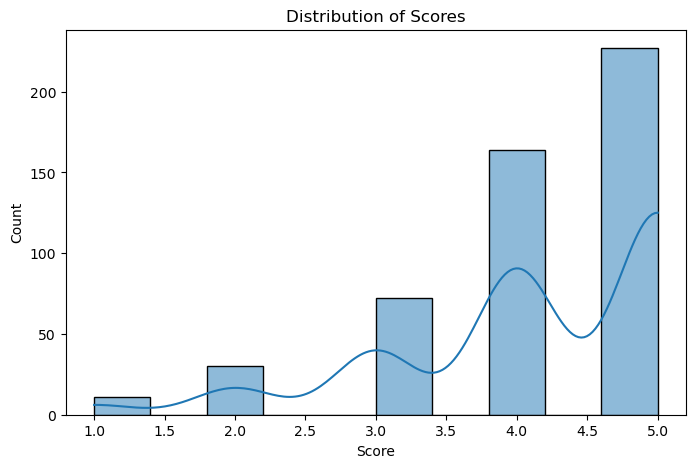

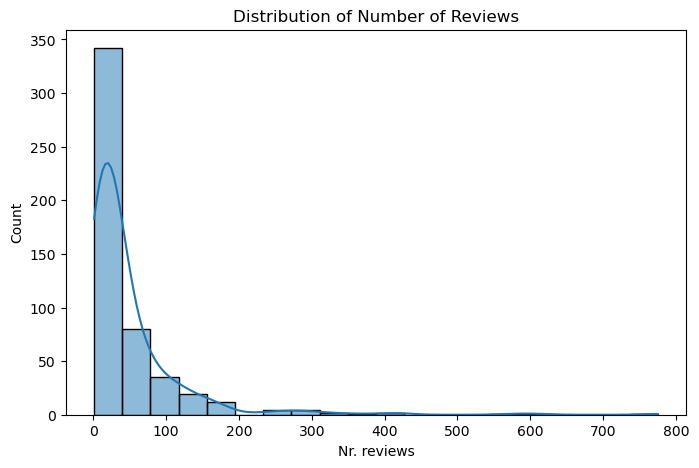

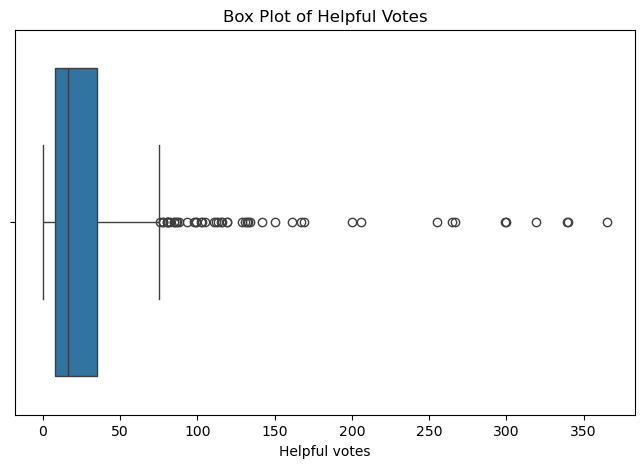

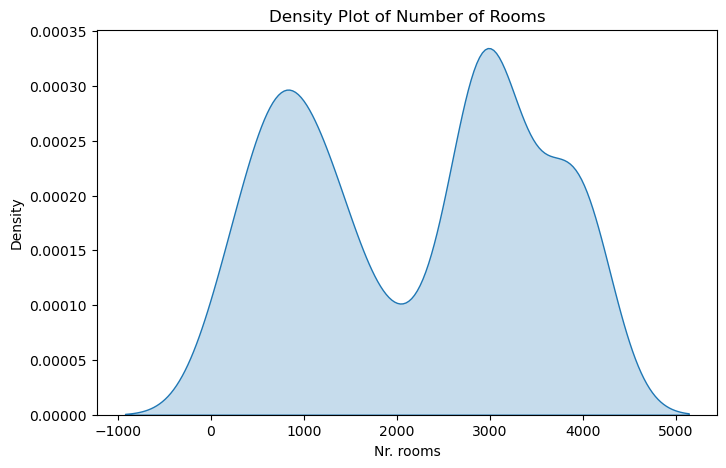

In [18]:
# Histogram for 'Score'
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], kde=True, bins=10)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.show()

# Histogram for 'Nr. reviews'
plt.figure(figsize=(8, 5))
sns.histplot(df['Nr. reviews'], kde=True, bins=20)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Nr. reviews')
plt.show()

# Box plot for 'Helpful votes'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Helpful votes'])
plt.title('Box Plot of Helpful Votes')
plt.xlabel('Helpful votes')
plt.show()

# Density plot for 'Nr. rooms'
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Nr. rooms'], fill=True)
plt.title('Density Plot of Number of Rooms')
plt.xlabel('Nr. rooms')
plt.show()


### Bivariate Analysis: Scatter Plots and Correlation

We’ll explore relationships between pairs of numerical variables, such as `Score` vs. `Nr. reviews` and `Score` vs. `Helpful votes`, using scatter plots. We’ll also use a correlation matrix to examine the strength of these relationships.


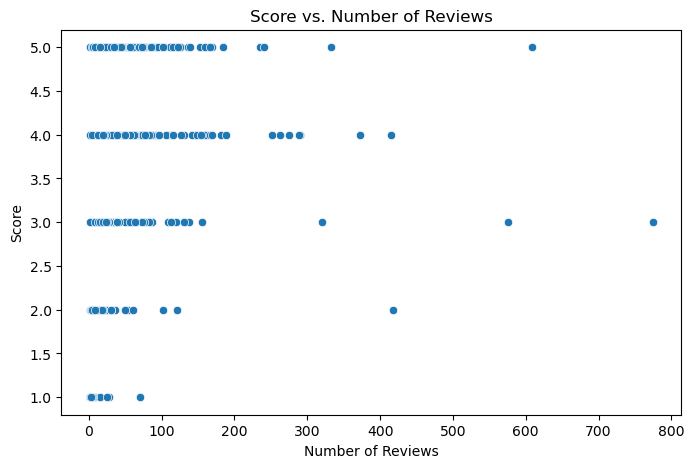

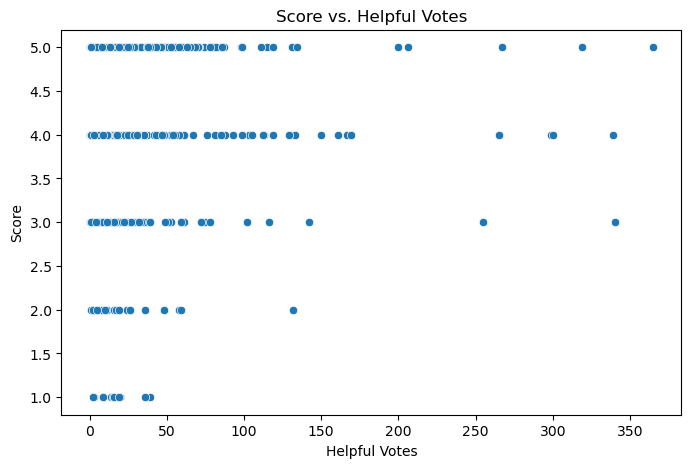

In [20]:
# Scatter plot of 'Score' vs 'Nr. reviews'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Nr. reviews', y='Score')
plt.title('Score vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Score')
plt.show()

# Scatter plot of 'Score' vs 'Helpful votes'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Helpful votes', y='Score')
plt.title('Score vs. Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Score')
plt.show()


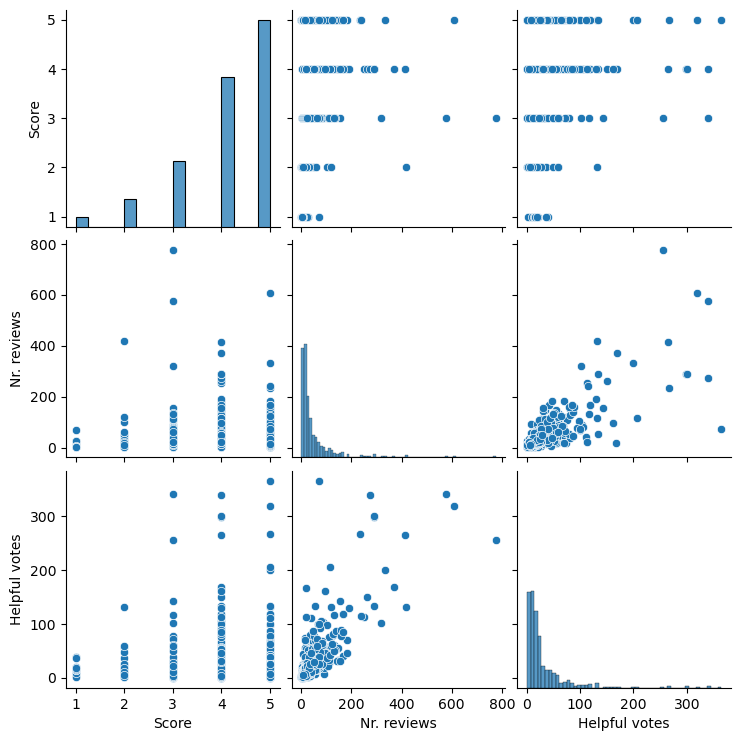

In [21]:
# Pair plot for selected numerical columns
sns.pairplot(df[['Score', 'Nr. reviews', 'Helpful votes']])
plt.show()


### Multivariate Analysis: Heatmap

A heatmap can show the interaction between multiple variables, especially categorical variables like `Traveler type` and `Hotel stars`.


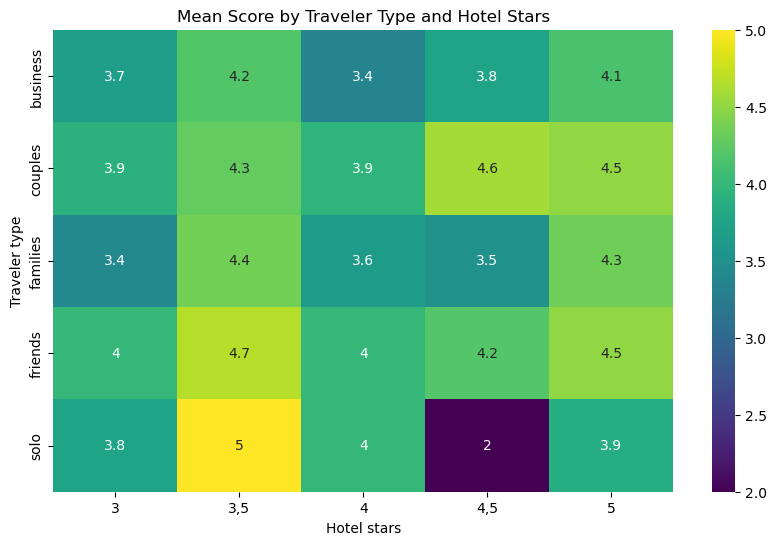

In [23]:
# Heatmap of mean scores by 'Traveler type' and 'Hotel stars'
pivot_table = df.pivot_table(values='Score', index='Traveler type', columns='Hotel stars')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Mean Score by Traveler Type and Hotel Stars')
plt.show()


### Multivariate Analysis: Principal Component Analysis (PCA)

To reduce the dimensionality of the dataset and identify key patterns, we’ll apply PCA to the numerical columns. PCA helps reveal patterns in high-dimensional data.


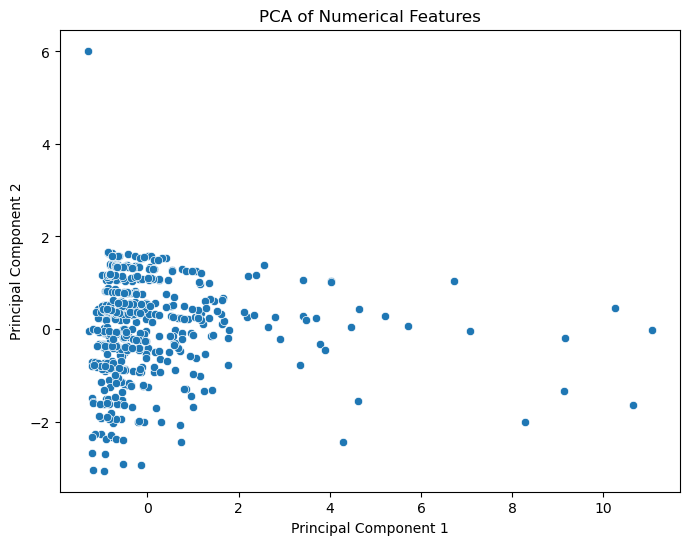

In [25]:
# Selecting numerical columns for PCA
numerical_df = df.select_dtypes(include=[np.number]).dropna()

# Standardize the data (PCA works best on standardized data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_df)

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numerical_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Numerical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Regression Analysis on Las Vegas Trip Advisor Dataset

In this notebook, we will perform various types of regression analyses on the Las Vegas Trip Advisor dataset, including:
1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
4. Logistic Regression
5. Regularization Techniques
6. Advanced Regression Techniques

## Data Preparation

We’ll start by loading the necessary libraries and preparing the data for regression analysis.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import QuantileRegressor, PoissonRegressor
from statsmodels.api import GLM
from statsmodels.genmod.families import NegativeBinomial
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

# Preprocess: Convert categorical variables if necessary, handle missing values, etc.
# Assume we’re focusing on predicting `Score` using numerical predictors only.
df = df.dropna()


## Simple Linear Regression

We’ll perform a simple linear regression using `Nr. reviews` to predict `Score`.


R^2 Score: -0.00
RMSE: 1.01


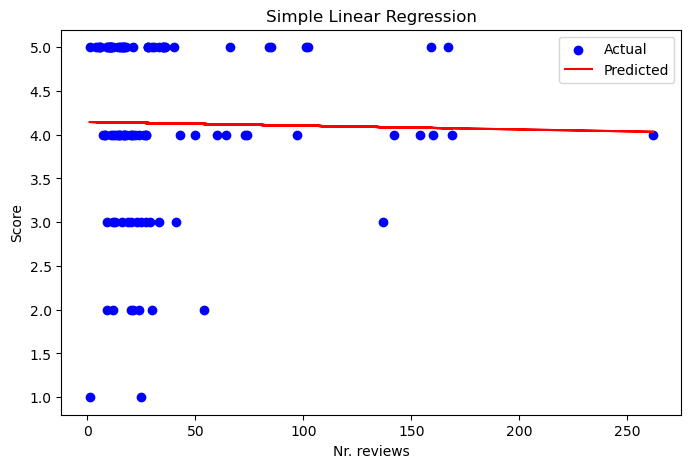

In [29]:
# Define features and target
X = df[['Nr. reviews']]
y = df['Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression Model
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = simple_lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Nr. reviews')
plt.ylabel('Score')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


## Multiple Linear Regression

We’ll use multiple predictor variables to predict `Score`.


R^2 Score: 0.02
RMSE: 1.00


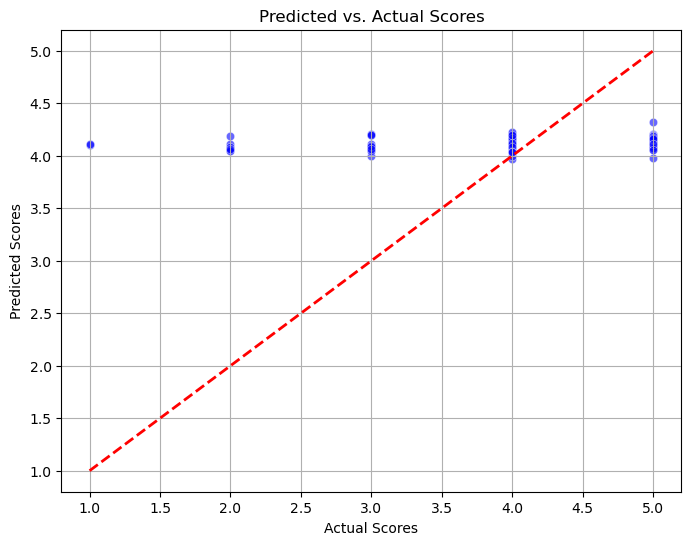

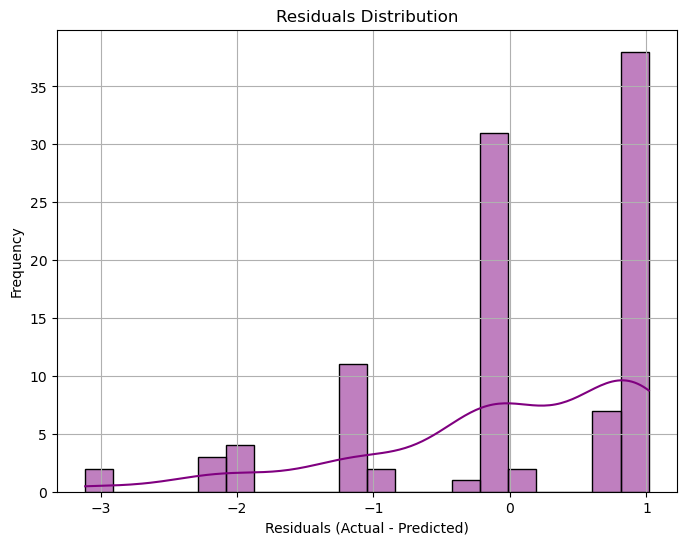

In [31]:
# Define features and target
X = df[['Nr. reviews', 'Helpful votes', 'Nr. rooms']]
y = df['Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression Model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = multiple_lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs. Actual Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. Actual Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## Polynomial Regression

To capture non-linear relationships, we’ll apply polynomial regression and compare it with linear regression.


R^2 Score (Polynomial Regression): 1.00
RMSE (Polynomial Regression): 0.13


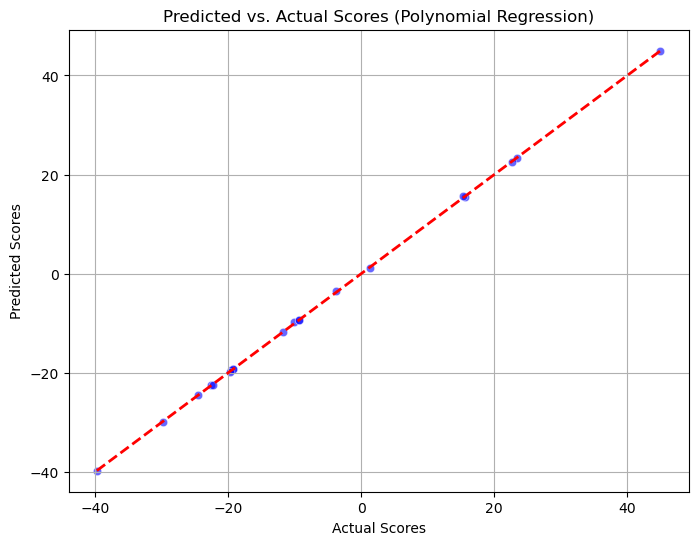

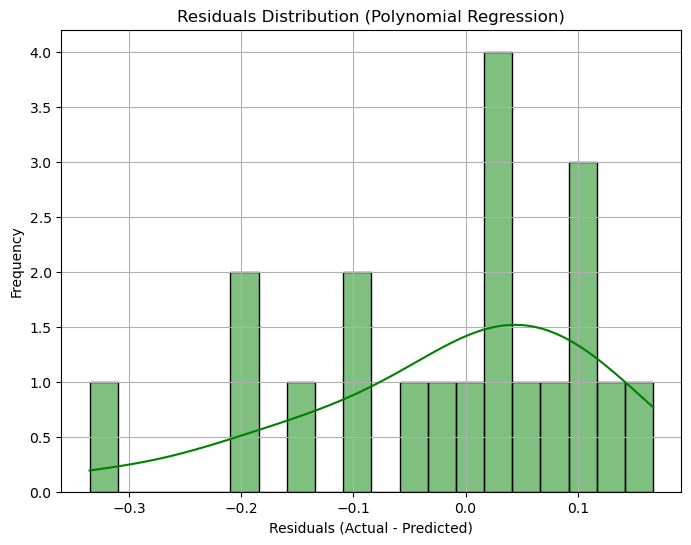

In [82]:
# Polynomial transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polynomial Regression Model
poly_lr = LinearRegression()
poly_lr.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = poly_lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2 Score (Polynomial Regression): {r2:.2f}")
print(f"RMSE (Polynomial Regression): {rmse:.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs. Actual Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. Actual Scores (Polynomial Regression)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20, color='green')
plt.title('Residuals Distribution (Polynomial Regression)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## Logistic Regression

We’ll use logistic regression for binary classification. We’ll create a binary target variable where scores above a certain threshold are `1` (highly rated) and below are `0` (low-rated).


Accuracy: 0.53
Precision: 0.46
Recall: 0.27
ROC-AUC: 0.51


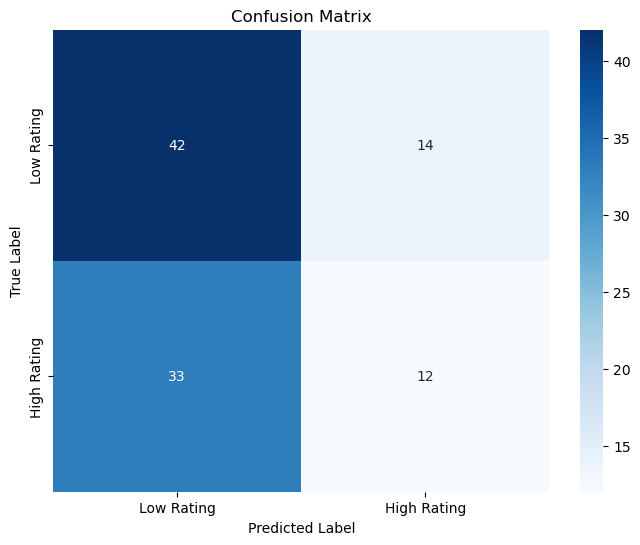

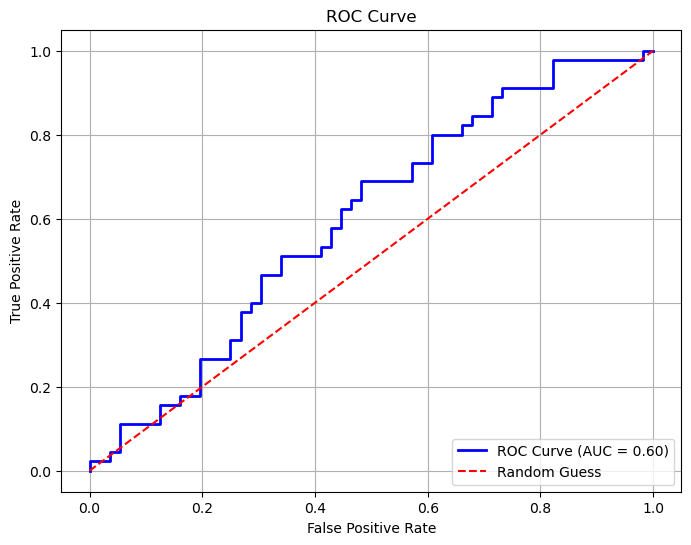

In [84]:
# Binarize target variable
df['High_Rating'] = np.where(df['Score'] > df['Score'].median(), 1, 0)
X = df[['Nr. reviews', 'Helpful votes', 'Nr. rooms']]
y = df['High_Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Rating', 'High Rating'], yticklabels=['Low Rating', 'High Rating'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



## Regularization Techniques: Lasso, Ridge, and Elastic Net Regression

Regularization techniques help handle multicollinearity and prevent overfitting.


R^2 (Ridge): 0.02
R^2 (Lasso): 0.02
R^2 (ElasticNet): 0.02


C:\Users\rushi\AppData\Local\Temp\ipykernel_23332\4138905004.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=r2_scores, palette='coolwarm')


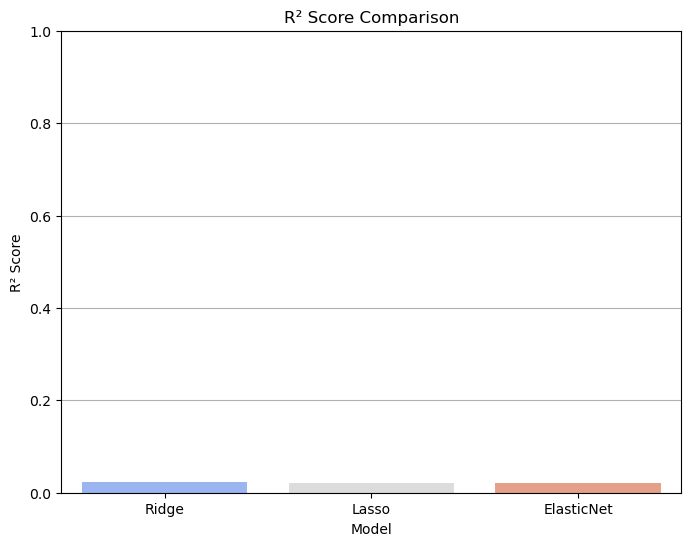

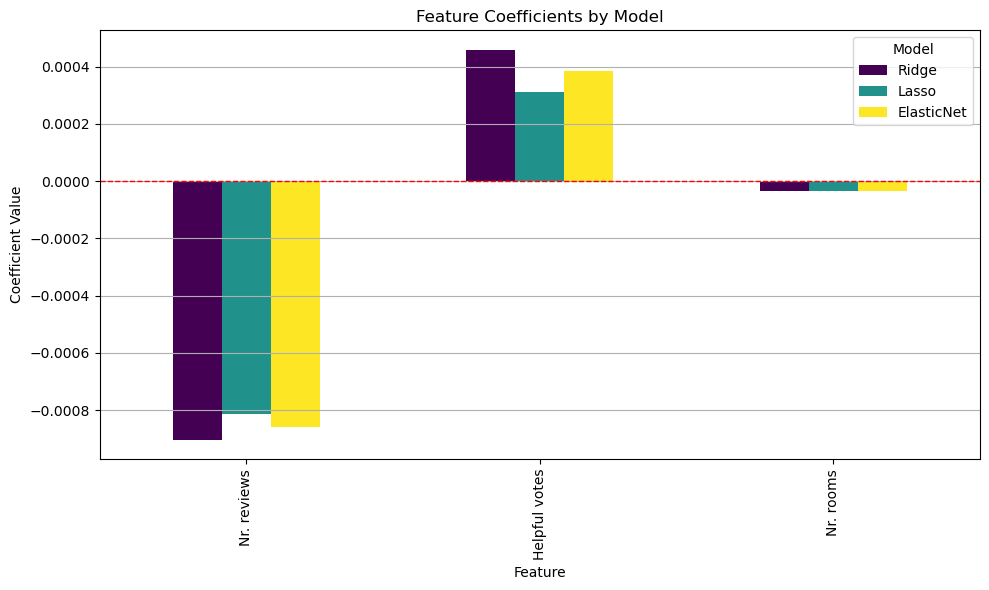

In [86]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_r2 = r2_score(y_test, ridge.predict(X_test))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_r2 = r2_score(y_test, lasso.predict(X_test))

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_r2 = r2_score(y_test, elastic_net.predict(X_test))

print(f"R^2 (Ridge): {ridge_r2:.2f}")
print(f"R^2 (Lasso): {lasso_r2:.2f}")
print(f"R^2 (ElasticNet): {elastic_net_r2:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for comparison of R² scores
r2_scores = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'R² Score': [ridge_r2, lasso_r2, elastic_net_r2]
})

# Bar Plot: R² Scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R² Score', data=r2_scores, palette='coolwarm')
plt.title('R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # R² scores range between 0 and 1
plt.grid(axis='y')
plt.show()

# Coefficient Plot: Visualizing Coefficients for Each Model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elastic_net.coef_
})

coefficients.set_index('Feature', inplace=True)

# Plot coefficients
coefficients.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Feature Coefficients by Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Line to indicate zero
plt.legend(title='Model')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Advanced Regression Techniques

### Quantile Regression


R^2 (Quantile Regression): -0.80


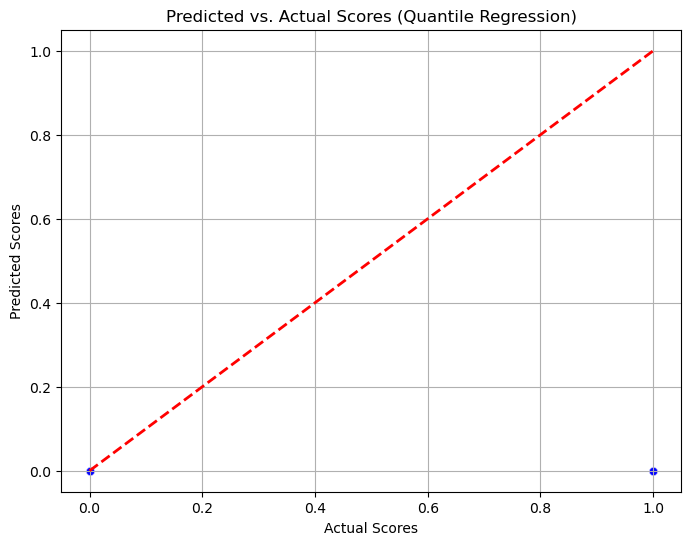

In [92]:
quantile_reg = QuantileRegressor(quantile=0.5)
quantile_reg.fit(X_train, y_train)
quantile_r2 = r2_score(y_test, quantile_reg.predict(X_test))
print(f"R^2 (Quantile Regression): {quantile_r2:.2f}")


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=quantile_reg.predict(X_test), color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. Actual Scores (Quantile Regression)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()


### Poisson Regression (for count data)


R^2 (Poisson Regression): 0.02


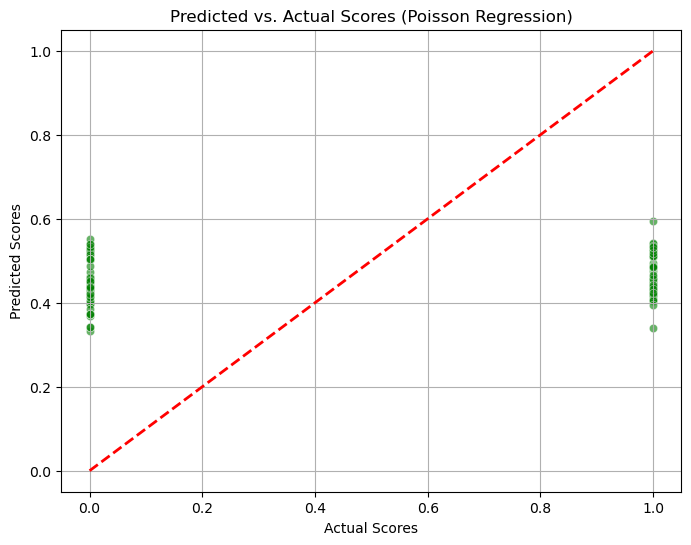

In [94]:
poisson_reg = PoissonRegressor()
poisson_reg.fit(X_train, y_train)
poisson_r2 = r2_score(y_test, poisson_reg.predict(X_test))
print(f"R^2 (Poisson Regression): {poisson_r2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=poisson_reg.predict(X_test), color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. Actual Scores (Poisson Regression)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

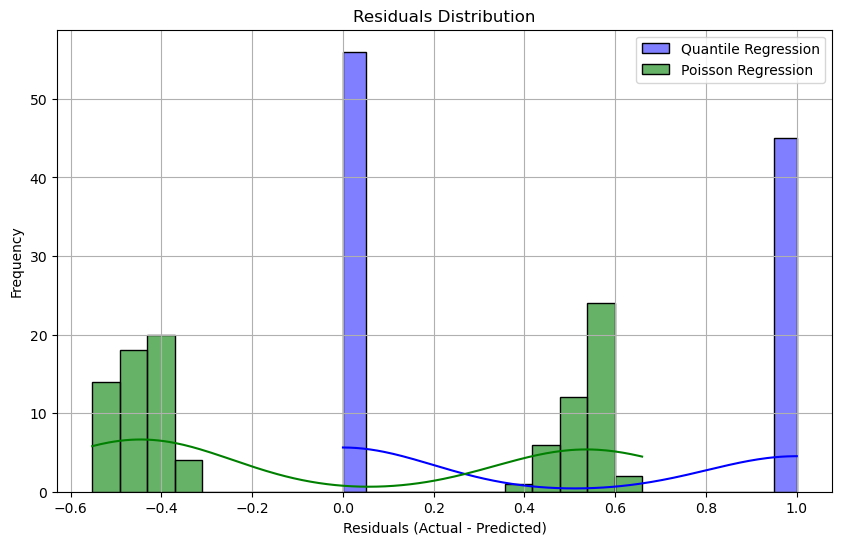

In [96]:
residuals_quantile = y_test - quantile_reg.predict(X_test)
residuals_poisson = y_test - poisson_reg.predict(X_test)

plt.figure(figsize=(10, 6))
sns.histplot(residuals_quantile, kde=True, bins=20, color='blue', label='Quantile Regression')
sns.histplot(residuals_poisson, kde=True, bins=20, color='green', label='Poisson Regression', alpha=0.6)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation and Comparison

In this section, we’ll evaluate the performance of each regression model using metrics such as R² (coefficient of determination), RMSE (Root Mean Squared Error) for regression models, and accuracy, precision, recall, and ROC-AUC for the logistic regression model. We’ll then compare the models and visualize the results to interpret their performance.


In [43]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Simple Linear Regression
def simple_linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicting and evaluating the model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Visualizing the regression line
    plt.scatter(X_test, y_test, color='blue', label='True values')
    plt.plot(X_test, y_pred, color='red', label='Regression line')
    plt.xlabel('Predictor')
    plt.ylabel('Target')
    plt.title('Simple Linear Regression')
    plt.legend()
    plt.show()
    
    return r2, rmse

# Example usage
# r2, rmse = simple_linear_regression(X_train, y_train, X_test, y_test)


In [140]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

def multiple_linear_regression(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicting and evaluating the model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Analyzing the significance of each predictor variable using statsmodels
    X_train_with_const = sm.add_constant(X_train)
    ols_model = sm.OLS(y_train, X_train_with_const).fit()
    print(ols_model.summary())  # Prints statistical summary

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Plot 1: Predicted vs. Actual Values
    # Scatter plot: Predicted vs. Actual Scores
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title('Predicted vs. Actual Scores')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.grid(True)
    plt.show()
    

# Example usage
# y_pred = model.predict(X_test)
# plot_multiple_linear_regression(X_test, y_test, y_pred)

    
    return r2, rmse

# Example usage
# r2, rmse = multiple_linear_regression(X_train, y_train, X_test, y_test)


In [136]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def polynomial_regression(X_train, y_train, X_test, y_test, degree=2):
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Predicting and evaluating the model
    y_pred = model.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Visualizing the polynomial regression line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title('Predicted vs. Actual Scores (Polynomial Regression)')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.grid(True)
    plt.show()
    
    return r2, rmse

# Example usage
# r2, rmse = polynomial_regression(X_train, y_train, X_test, y_test, degree=3)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{cm}")
    
    return accuracy, precision, recall, roc_auc

# Example usage
# accuracy, precision, recall, roc_auc = logistic_regression(X_train, y_train, X_test, y_test)


In [47]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

def lasso_ridge_regression(X_train, y_train, X_test, y_test, alpha=1.0):
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    # Predicting with Lasso and Ridge
    lasso_pred = lasso.predict(X_test)
    ridge_pred = ridge.predict(X_test)
    
    lasso_r2 = r2_score(y_test, lasso_pred)
    ridge_r2 = r2_score(y_test, ridge_pred)
    
    lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
    ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
    
    print(f"Lasso R²: {lasso_r2}, RMSE: {lasso_rmse}")
    print(f"Ridge R²: {ridge_r2}, RMSE: {ridge_rmse}")
    
    return lasso_r2, ridge_r2, lasso_rmse, ridge_rmse

# Example usage
# lasso_r2, ridge_r2, lasso_rmse, ridge_rmse = lasso_ridge_regression(X_train, y_train, X_test, y_test)


In [48]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

def elastic_net_regression(X_train, y_train, X_test, y_test, alpha=1.0, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    
    # Predicting and evaluating the model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"ElasticNet R²: {r2}, RMSE: {rmse}")
    
    return r2, rmse

# Example usage
# r2, rmse = elastic_net_regression(X_train, y_train, X_test, y_test)


In [49]:
import statsmodels.api as sm

def quantile_regression(X_train, y_train, X_test, y_test, quantile=0.5):
    model = sm.QuantReg(y_train, X_train).fit(q=quantile)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"Quantile Regression R²: {r2}, RMSE: {rmse}")
    
    return r2, rmse

# Example usage
# r2, rmse = quantile_regression(X_train, y_train, X_test, y_test)


In [50]:
import statsmodels.api as sm

def poisson_regression(X_train, y_train, X_test, y_test):
    model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"Poisson Regression R²: {r2}, RMSE: {rmse}")
    
    return r2, rmse

# Example usage
# r2, rmse = poisson_regression(X_train, y_train, X_test, y_test)


C:\Users\rushi\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


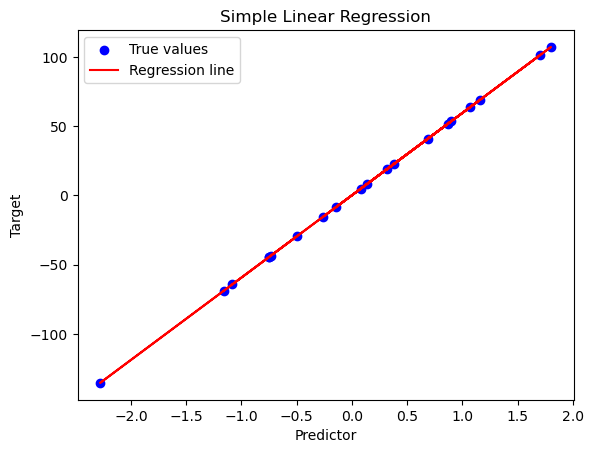

Simple Linear Regression: R² = 0.9999976755369517, RMSE = 0.09178615756411733
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.516e+07
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          3.86e-216
Time:                        21:51:42   Log-Likelihood:                 77.653
No. Observations:                  80   AIC:                            -149.3
Df Residuals:                      77   BIC:                            -142.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

C:\Users\rushi\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


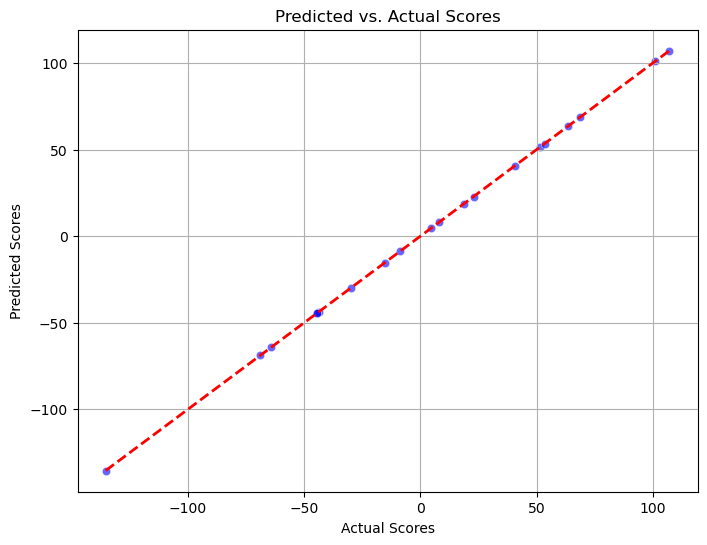

Multiple Linear Regression: R² = 0.9999974709161151, RMSE = 0.09574089504803873


C:\Users\rushi\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


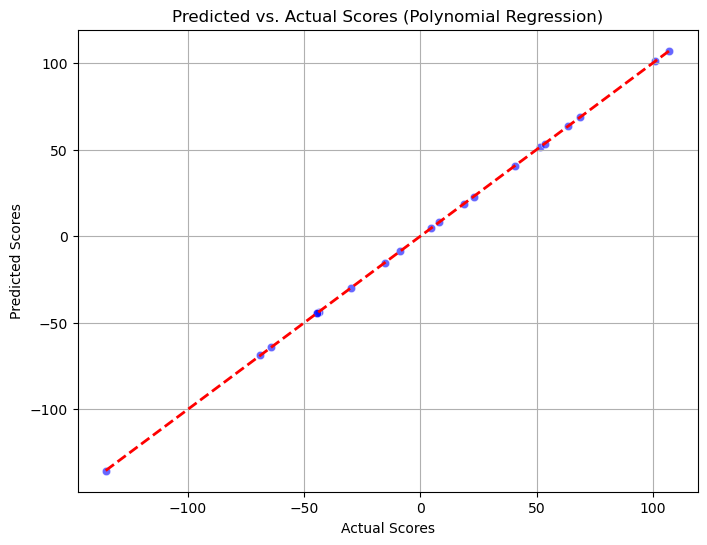

Polynomial Regression: R² = 0.9999974709161151, RMSE = 0.09574089504802497
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
ROC-AUC: 1.0
Confusion Matrix:
[[10  0]
 [ 0 10]]
Logistic Regression: Accuracy = 1.0, Precision = 1.0, Recall = 1.0, ROC-AUC = 1.0
Lasso R²: 0.99966515888207, RMSE: 1.101628740372356
Ridge R²: 0.9996749411724503, RMSE: 1.085417572510222
Lasso Regression: R² = 0.99966515888207, RMSE = 1.101628740372356
Ridge Regression: R² = 0.9996749411724503, RMSE = 1.085417572510222
ElasticNet R²: 0.8254150782431864, RMSE: 25.15470522304315
ElasticNet Regression: R² = 0.8254150782431864, RMSE = 25.15470522304315


C:\Users\rushi\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\rushi\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\rushi\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [142]:
# Prepare your data (X_train, X_test, y_train, y_test) before running this

# Example Data (You would replace this with your actual data)
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Create a simple regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run and get output for each regression model

# 1. Simple Linear Regression
r2_simple, rmse_simple = simple_linear_regression(X_train, y_train, X_test, y_test)
print(f"Simple Linear Regression: R² = {r2_simple}, RMSE = {rmse_simple}")

# 2. Multiple Linear Regression (Use more than one feature)
X_multi = np.hstack((X, X**2))  # Adding a quadratic term for simplicity
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)
r2_multi, rmse_multi = multiple_linear_regression(X_train_multi, y_train, X_test_multi, y_test)
print(f"Multiple Linear Regression: R² = {r2_multi}, RMSE = {rmse_multi}")

# 3. Polynomial Regression (Degree 2 for simplicity)
r2_poly, rmse_poly = polynomial_regression(X_train, y_train, X_test, y_test, degree=2)
print(f"Polynomial Regression: R² = {r2_poly}, RMSE = {rmse_poly}")

# 4. Logistic Regression (Example for binary classification)
from sklearn.datasets import make_classification
X_class, y_class = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=1, n_classes=2, random_state=42)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Apply logistic regression
accuracy, precision, recall, roc_auc = logistic_regression(X_train_class, y_train_class, X_test_class, y_test_class)
print(f"Logistic Regression: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}, ROC-AUC = {roc_auc}")

# 5. Lasso and Ridge Regression
lasso_r2, ridge_r2, lasso_rmse, ridge_rmse = lasso_ridge_regression(X_train_multi, y_train, X_test_multi, y_test)
print(f"Lasso Regression: R² = {lasso_r2}, RMSE = {lasso_rmse}")
print(f"Ridge Regression: R² = {ridge_r2}, RMSE = {ridge_rmse}")

# 6. ElasticNet Regression
r2_en, rmse_en = elastic_net_regression(X_train_multi, y_train, X_test_multi, y_test)
print(f"ElasticNet Regression: R² = {r2_en}, RMSE = {rmse_en}")
